In [10]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist

In [22]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255) * 2 - 1
test_images = (test_images / 255) * 2 - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [8]:
train_labels[0]

5

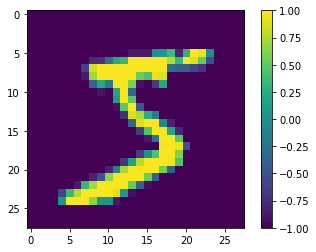

In [13]:
plt.imshow(train_images[0].reshape(28,28))
plt.colorbar()

In [17]:
# Build the model.
model = Sequential()
model.add( Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(  Dense(10, activation='softmax'))

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


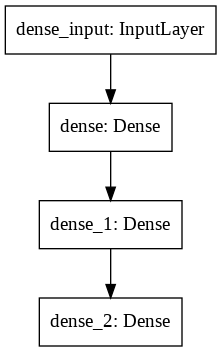

In [19]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [20]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=5,
  batch_size=32, validation_split=0.2
)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3628 - accuracy: 0.8887 - val_loss: 0.2133 - val_accuracy: 0.9337
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1866 - accuracy: 0.9421 - val_loss: 0.1522 - val_accuracy: 0.9547
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1483 - accuracy: 0.9540 - val_loss: 0.1375 - val_accuracy: 0.9595
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1287 - accuracy: 0.9596 - val_loss: 0.1455 - val_accuracy: 0.9566
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1119 - accuracy: 0.9650 - val_loss: 0.1373 - val_accuracy: 0.9582


In [24]:
N_test = 10
# Predict on the first 5 test images.
predictions = model.predict(test_images[:N_test])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labels[:N_test])

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


In [25]:
predictions[0,:]

array([2.5040992e-05, 1.3213840e-06, 1.5408825e-05, 6.5717766e-05,
       3.5776397e-09, 2.5477838e-09, 6.9576709e-14, 9.9971968e-01,
       1.0763316e-06, 1.7179061e-04], dtype=float32)

Text(0, 0.5, 'y_net[i]')

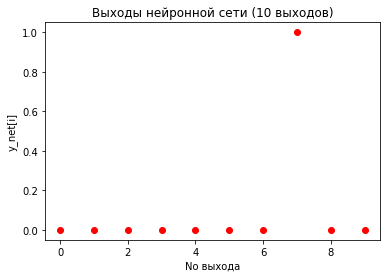

In [26]:
plt.plot(predictions[0,:], 'or')
plt.title('Выходы нейронной сети (10 выходов)')
plt.xlabel('No выхода')
plt.ylabel('y_net[i]')

In [27]:
y_pred = np.argmax(predictions, axis=1)

In [28]:
y_pred[:N_test]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

Text(0, 0.5, 'y_pred')

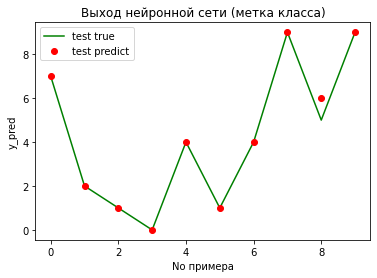

In [29]:
plt.plot(testn_labels[:N_test], 'g',label = 'test true')
plt.plot(y_pred[:N_test], 'or',label='test predict')
plt.legend()
plt.title('Выход нейронной сети (метка класса)')
plt.xlabel('No примера')
plt.ylabel('y_pred')

In [30]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')